# Finance & Accounting Courses - Udemy (13k + course))

# Import Libraraies:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset:

In [2]:
df = pd.read_csv('udemy_output_All_Finance__Accounting_p1_p626.csv')

In [3]:
df.size

272160

In [4]:
df.columns

Index(['id', 'title', 'url', 'is_paid', 'num_subscribers', 'avg_rating',
       'avg_rating_recent', 'rating', 'num_reviews', 'is_wishlisted',
       'num_published_lectures', 'num_published_practice_tests', 'created',
       'published_time', 'discount_price__amount', 'discount_price__currency',
       'discount_price__price_string', 'price_detail__amount',
       'price_detail__currency', 'price_detail__price_string'],
      dtype='object')

In [5]:
df.describe()

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,1.360800e+04,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,12205.000000,13111.000000
mean,1.681721e+06,2847.010435,3.923293,3.912242,3.912242,243.169827,32.224794,0.110523,493.943794,4646.992602
std,9.539271e+05,9437.865634,1.031304,1.039237,1.039237,1580.965895,42.766911,0.623501,267.827260,3109.101019
min,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,455.000000,1280.000000
25%,8.580862e+05,62.000000,3.800000,3.787315,3.787315,7.000000,12.000000,0.000000,455.000000,1600.000000
50%,1.623421e+06,533.000000,4.194440,4.181735,4.181735,24.000000,21.000000,0.000000,455.000000,3200.000000
75%,2.503720e+06,2279.500000,4.450000,4.452105,4.452105,87.000000,37.000000,0.000000,455.000000,8640.000000
max,3.486006e+06,374836.000000,5.000000,5.000000,5.000000,78006.000000,699.000000,6.000000,3200.000000,12800.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

In [7]:
df.info

<bound method DataFrame.info of             id                                              title  \
0       762616  The Complete SQL Bootcamp 2020: Go from Zero t...   
1       937678  Tableau 2020 A-Z: Hands-On Tableau Training fo...   
2      1361790             PMP Exam Prep Seminar -  PMBOK Guide 6   
3       648826         The Complete Financial Analyst Course 2020   
4       637930  An Entire MBA in 1 Course:Award Winning Busine...   
...        ...                                                ...   
13603  3005408                      מושגים בסיסיים באופציות חלק ב   
13604  3467284                            Programa de Integridade   
13605  3368222  Goodwill and Method of Calculating Goodwill (A...   
13606  3211345                                Poderoso Investidor   
13607  2935720         Acabou a Previdência e agora? -  Volume 03   

                                                     url  is_paid  \
0                     /course/the-complete-sql-bootcamp/     True   
1

In [8]:
df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


# Step 3 DATA PREPROCESSING:

<Axes: >

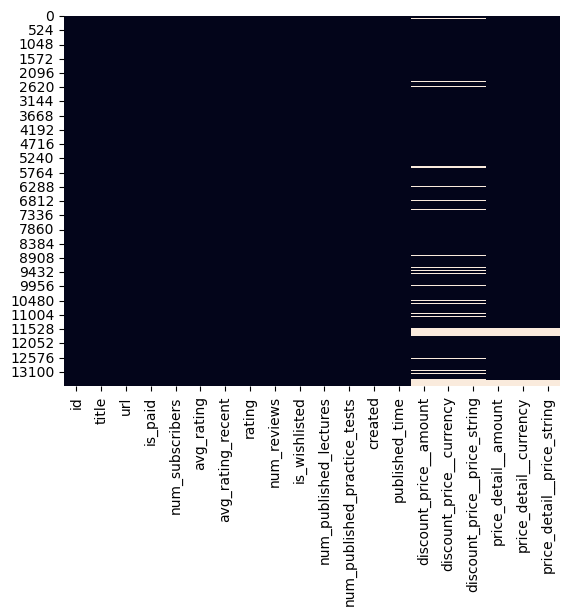

In [9]:
# handle missing values:
plt.figure(figure=(20,20))
sns.heatmap(df.isnull(),cbar=False)

In [10]:
df.isnull().sum()

id                                 0
title                              0
url                                0
is_paid                            0
num_subscribers                    0
avg_rating                         0
avg_rating_recent                  0
rating                             0
num_reviews                        0
is_wishlisted                      0
num_published_lectures             0
num_published_practice_tests       0
created                            0
published_time                     0
discount_price__amount          1403
discount_price__currency        1403
discount_price__price_string    1403
price_detail__amount             497
price_detail__currency           497
price_detail__price_string       497
dtype: int64

# Nan Fill with mode

In [11]:
Counter(df['discount_price__amount'])

Counter({455.0: 11410,
         468.0: 135,
         700.0: 86,
         3200.0: 61,
         462.0: 47,
         481.0: 44,
         800.0: 39,
         520.0: 34,
         474.0: 30,
         488.0: 27,
         1600.0: 27,
         640.0: 24,
         494.0: 22,
         480.0: 17,
         2400.0: 16,
         960.0: 13,
         720.0: 12,
         1440.0: 11,
         2880.0: 10,
         2080.0: 9,
         1920.0: 8,
         1520.0: 8,
         1200.0: 8,
         500.0: 7,
         2240.0: 7,
         1120.0: 7,
         514.0: 6,
         2720.0: 6,
         1280.0: 6,
         507.0: 5,
         2000.0: 5,
         2160.0: 5,
         1360.0: 5,
         560.0: 5,
         1040.0: 5,
         1760.0: 4,
         1680.0: 3,
         3040.0: 3,
         2800.0: 3,
         880.0: 3,
         540.0: 2,
         546.0: 2,
         533.0: 2,
         552.0: 2,
         2320.0: 2,
         2560.0: 2,
         2960.0: 2,
         2640.0: 2,
         3120.0: 2,
         nan: 1,
   

In [12]:
df.fillna({'discount_price__amount':'455.0'}, inplace=True)

In [13]:
Counter(df['discount_price__currency'])

Counter({'INR': 12205, nan: 1403})

In [14]:
df.fillna({'discount_price__currency':'INR'}, inplace=True)

In [15]:
Counter(df['discount_price__price_string'])

Counter({'₹455': 11410,
         nan: 1403,
         '₹468': 135,
         '₹700': 86,
         '₹3,200': 61,
         '₹462': 47,
         '₹481': 44,
         '₹800': 39,
         '₹520': 34,
         '₹474': 30,
         '₹488': 27,
         '₹1,600': 27,
         '₹640': 24,
         '₹494': 22,
         '₹480': 17,
         '₹2,400': 16,
         '₹960': 13,
         '₹720': 12,
         '₹1,440': 11,
         '₹2,880': 10,
         '₹2,080': 9,
         '₹1,920': 8,
         '₹1,520': 8,
         '₹1,200': 8,
         '₹500': 7,
         '₹2,240': 7,
         '₹1,120': 7,
         '₹514': 6,
         '₹2,720': 6,
         '₹1,280': 6,
         '₹507': 5,
         '₹2,000': 5,
         '₹2,160': 5,
         '₹1,360': 5,
         '₹560': 5,
         '₹1,040': 5,
         '₹1,760': 4,
         '₹1,680': 3,
         '₹3,040': 3,
         '₹2,800': 3,
         '₹880': 3,
         '₹540': 2,
         '₹546': 2,
         '₹533': 2,
         '₹552': 2,
         '₹2,320': 2,
         '₹2,

In [17]:
df.fillna({'discount_price__currency':'₹455'}, inplace=True)

In [19]:
Counter(df['price_detail__amount'])

Counter({8640.0: 3213,
         1280.0: 3033,
         3200.0: 1033,
         6400.0: 984,
         1600.0: 777,
         1920.0: 689,
         2560.0: 451,
         2240.0: 406,
         6080.0: 285,
         4800.0: 251,
         2880.0: 241,
         5120.0: 183,
         3840.0: 182,
         5760.0: 166,
         4480.0: 154,
         8000.0: 142,
         3520.0: 125,
         12800.0: 123,
         7680.0: 94,
         4160.0: 93,
         8320.0: 71,
         6720.0: 67,
         5440.0: 67,
         7040.0: 62,
         8960.0: 52,
         9600.0: 52,
         7360.0: 41,
         9280.0: 34,
         10240.0: 8,
         12480.0: 8,
         11840.0: 6,
         12160.0: 4,
         11520.0: 4,
         9920.0: 3,
         11200.0: 3,
         10560.0: 2,
         10880.0: 2,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1

In [20]:
df.fillna({'price_detail__amount':'8640.0'}, inplace =True)

In [21]:
Counter(df['price_detail__currency']) 

Counter({'INR': 13111, nan: 497})

In [22]:
df.fillna({'price_detail__currency':'INR'}, inplace=True)

In [23]:
Counter(df['price_detail__price_string'])

Counter({'₹8,640': 3213,
         '₹1,280': 3033,
         '₹3,200': 1033,
         '₹6,400': 984,
         '₹1,600': 777,
         '₹1,920': 689,
         nan: 497,
         '₹2,560': 451,
         '₹2,240': 406,
         '₹6,080': 285,
         '₹4,800': 251,
         '₹2,880': 241,
         '₹5,120': 183,
         '₹3,840': 182,
         '₹5,760': 166,
         '₹4,480': 154,
         '₹8,000': 142,
         '₹3,520': 125,
         '₹12,800': 123,
         '₹7,680': 94,
         '₹4,160': 93,
         '₹8,320': 71,
         '₹6,720': 67,
         '₹5,440': 67,
         '₹7,040': 62,
         '₹8,960': 52,
         '₹9,600': 52,
         '₹7,360': 41,
         '₹9,280': 34,
         '₹10,240': 8,
         '₹12,480': 8,
         '₹11,840': 6,
         '₹12,160': 4,
         '₹11,520': 4,
         '₹9,920': 3,
         '₹11,200': 3,
         '₹10,560': 2,
         '₹10,880': 2})

In [24]:
df.fillna({'price_detail__price_string':'₹8,640'}, inplace=True)

In [25]:
df.isnull().sum()

id                                 0
title                              0
url                                0
is_paid                            0
num_subscribers                    0
avg_rating                         0
avg_rating_recent                  0
rating                             0
num_reviews                        0
is_wishlisted                      0
num_published_lectures             0
num_published_practice_tests       0
created                            0
published_time                     0
discount_price__amount             0
discount_price__currency           0
discount_price__price_string    1403
price_detail__amount               0
price_detail__currency             0
price_detail__price_string         0
dtype: int64

In [27]:
# Convert categorical columns to numerical using One-Hot Encoding
df = pd.get_dummies(df, columns=['is_paid',
'discount_price__currency', 'price_detail__currency'],
drop_first=True)

# Feature Selection:

In [29]:
# Select features (independent variables) and target (dependent variable)
X = df[['avg_rating', 'num_reviews', 'num_published_lectures',
'discount_price__amount', 'price_detail__amount']]
y = df['num_subscribers']

# Train-Test-Split:

In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

# Train the model:

In [31]:
# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100,
random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Make predictions:

In [32]:
# Predicting the number of subscribers using the test set
y_pred = model.predict(X_test)

# Evaluate the model:

In [33]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 38452694.56672891


In [34]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.678454190024053


# Visualize result:

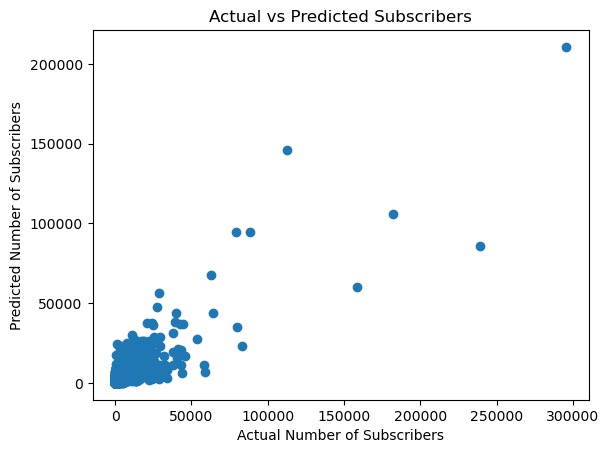

In [35]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Number of Subscribers")
plt.ylabel("Predicted Number of Subscribers")
plt.title("Actual vs Predicted Subscribers")
plt.show()